<a href="https://colab.research.google.com/github/EmilyPhang/Social-Media-Computing-Project-Sentiment-Analysis-of-Sephora-Reviews/blob/main/Preprocessing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Data Loading and Integration

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Drive mounted successfully!")

Mounting Google Drive...
Mounted at /content/drive
Drive mounted successfully!


In [2]:
df_product_info = pd.read_csv('/content/drive/MyDrive/Dataset/product_info.csv')
df_reviews_1 = pd.read_csv('/content/drive/MyDrive/Dataset/reviews_0-250.csv',index_col = 0, dtype={'author_id':'str'})
df_reviews_2 = pd.read_csv('/content/drive/MyDrive/Dataset/reviews_250-500.csv',index_col = 0, dtype={'author_id':'str'})
df_reviews_3 = pd.read_csv('/content/drive/MyDrive/Dataset/reviews_500-750.csv',index_col = 0, dtype={'author_id':'str'})
df_reviews_4 = pd.read_csv('/content/drive/MyDrive/Dataset/reviews_750-1250.csv',index_col = 0, dtype={'author_id':'str'})
df_reviews_5 = pd.read_csv('/content/drive/MyDrive/Dataset/reviews_1250-end.csv',index_col = 0, dtype={'author_id':'str'})

In [3]:
print("First 5 rows of df_product_info:")
display(df_product_info.head())

First 5 rows of df_product_info:


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
print("First 5 rows of df_reviews_1:")
display(df_reviews_1.head())

First 5 rows of df_reviews_1:


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Merge df_reviews_1 till df_reviews_5
df_reviews = pd.concat([df_reviews_1,df_reviews_2,df_reviews_3,df_reviews_4,df_reviews_5],axis=0)
print("df_reviews shape: ",df_reviews.shape)
print("df_product_info shape: ",df_product_info.shape)

df_reviews shape:  (1094411, 18)
df_product_info shape:  (8494, 27)


In [ ]:
# Check df_product_info which columns similar with df_reviews
cols_to_use = df_product_info.columns.difference(df_reviews.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [ ]:
df = pd.merge(df_reviews, df_product_info[cols_to_use], how='outer', on='product_id')
df.shape

(1100554, 40)

In [ ]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,

})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,1100554,935,1091034
1,sale_price_usd,float64,1100554,88,1090576
2,value_price_usd,float64,1100554,174,1069365
3,child_max_price,float64,1100554,222,644796
4,child_min_price,float64,1100554,208,644796
5,helpfulness,float64,1100554,3767,567735
6,review_title,object,1100554,364105,316797
7,hair_color,object,1100554,7,232911
8,eye_color,object,1100554,6,215771
9,skin_tone,object,1100554,14,176682


In [ ]:
# Drop columns that have too many missing values
df.drop(columns=['variation_desc', 'sale_price_usd', 'value_price_usd', 'child_max_price', 'child_min_price', 'review_title'], inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,...,online_only,out_of_stock,primary_category,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value
277,2206599853,5.0,1.0,1.000000,2.0,0.0,2.0,2023-03-09,I wanted to try these to help with the texture...,lightMedium,...,0,0,Skincare,1529.0,Treatments,0,60 pads,Blemish & Acne Treatments,Size,60 pads
278,1755055004,5.0,1.0,0.666667,3.0,1.0,2.0,2023-02-09,I’ve only been using this product for a few we...,medium,...,0,0,Skincare,1529.0,Treatments,0,60 pads,Blemish & Acne Treatments,Size,60 pads
279,21407018770,5.0,1.0,1.000000,1.0,0.0,1.0,2022-12-28,"￼ Ever since I’ve started using this, I’ve had...",light,...,0,0,Skincare,1529.0,Treatments,0,60 pads,Blemish & Acne Treatments,Size,60 pads
280,6645877566,5.0,1.0,1.000000,3.0,0.0,3.0,2022-12-07,I am in love with these must have acne pads. A...,lightMedium,...,0,0,Skincare,1529.0,Treatments,0,60 pads,Blemish & Acne Treatments,Size,60 pads
282,993395592,5.0,1.0,1.000000,6.0,0.0,6.0,2022-09-09,I’m so thankful that I discovered this product...,light,...,0,0,Skincare,1529.0,Treatments,0,60 pads,Blemish & Acne Treatments,Size,60 pads


In [ ]:
df.shape

(304400, 34)

## Sentiment Label Creation

In [ ]:
df['rating'] = df['rating'].astype(int)

# Map ratings to sentiment labels
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment_label'] = df['rating'].apply(map_sentiment)

display(df[['rating', 'sentiment_label']].head(10))

# Display the count of each sentiment category
print("\n", df['sentiment_label'].value_counts())

,rating,sentiment_label
277,5,positive
278,5,positive
279,5,positive
280,5,positive
282,5,positive
283,5,positive
284,5,positive
285,5,positive
286,2,negative
287,5,positive



 sentiment_label
positive    225866
negative     50907
neutral      27627
Name: count, dtype: int64


## Downsampling

In [ ]:
SAMPLES_PER_CLASS = 2600

df_positive = df[df['sentiment_label'] == 'positive']
df_negative = df[df['sentiment_label'] == 'negative']
df_neutral = df[df['sentiment_label'] == 'neutral']

# Randomly sample the desired number of rows from each class
positive_sampled = df_positive.sample(n=SAMPLES_PER_CLASS, random_state=42)
negative_sampled = df_negative.sample(n=SAMPLES_PER_CLASS, random_state=42)
neutral_sampled = df_neutral.sample(n=SAMPLES_PER_CLASS, random_state=42)

df_balanced = pd.concat([positive_sampled, negative_sampled, neutral_sampled])

# Shuffle the final DataFrame
df_balanced_shuffled = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


print("Shape of the new balanced DataFrame:")
print(df_balanced_shuffled.shape)

print("\nDistribution of sentiment labels in the new DataFrame:")
print(df_balanced_shuffled['sentiment_label'].value_counts())

print("\nFirst 5 rows of the DataFrame:")
display(df_balanced_shuffled.head())

Shape of the new balanced DataFrame:
(7800, 35)

Distribution of sentiment labels in the new DataFrame:
sentiment_label
positive    2600
neutral     2600
negative    2600
Name: count, dtype: int64

First 5 rows of the DataFrame:


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,...,out_of_stock,primary_category,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value,sentiment_label
0,5972581853,5,1.0,0.75,4.0,1.0,3.0,2018-12-21,I just started using these and they are amazin...,mediumTan,...,0,Skincare,4560.0,Treatments,0,20 Healing Dots,Blemish & Acne Treatments,Size,20 Healing Dots,positive
1,5806637205,5,1.0,1.00,2.0,0.0,2.0,2021-07-14,I’ve purchased this product so many times! I’m...,medium,...,0,Skincare,1964.0,Treatments,1,1 oz/ 30 mL,Face Serums,Size,1 oz/ 30 mL,positive
2,6637028158,5,1.0,1.00,5.0,0.0,5.0,2023-03-08,"First, I want to say I am not a professional w...",fair,...,0,Skincare,1182.0,Cleansers,0,4 oz/ 118 mL,Exfoliators,Size,4 oz/ 118 mL,positive
3,23890184577,3,1.0,1.00,1.0,0.0,1.0,2021-10-10,This rating is for this size in particular. I ...,light,...,0,Skincare,842.0,Moisturizers,0,1.7 oz/ 50 mL,Moisturizers,Size,1.7 oz/ 50 mL,neutral
4,5313908074,4,1.0,1.00,2.0,0.0,2.0,2023-02-07,this moisturizer has been incredible for the w...,medium,...,0,Skincare,150.0,Moisturizers,0,1.7 oz/ 50 mL,Moisturizers,Size,1.7 oz/ 50 mL,positive


## Text Cleaning and Normalization


In [ ]:
!pip install contractions
!pip install unidecode

In [ ]:
import re
import contractions
from unidecode import unidecode


def clean_text_for_bert(text):

    # Remove accented characters
    text = unidecode(text)

    # Remove Emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    text = emoji_pattern.sub(r'', text)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove special characters but keep essential punctuation .,!?'
    text = re.sub(r'[^a-z\s.,!?-]', '', text)

    # Remove extra whitespace and line breaks
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove space before punctuation
    text = re.sub(r'\s([.,!?-])', r'\1', text)

    return text


print("Starting text cleaning...")
df_balanced_shuffled['cleaned_review'] = df_balanced_shuffled['review_text'].apply(clean_text_for_bert)
print("Text cleaning complete!")

Starting text cleaning...
Text cleaning complete!


In [ ]:
# To verify and see all the steps in action
test_string = "Héllo 😊! This is a test for the crème de la crème. I can't believe it costs $50. Visit www.example.com for more info. 💕 <p>Great!</p>"
cleaned_test_string = clean_text_for_bert(test_string)

print("Test Case Verification")
print(f"ORIGINAL TEST: {test_string}")
print(f"CLEANED TEST:  {cleaned_test_string}")

Test Case Verification
ORIGINAL TEST: Héllo 😊! This is a test for the crème de la crème. I can't believe it costs $50. Visit www.example.com for more info. 💕 <p>Great!</p>
CLEANED TEST:  hello! this is a test for the creme de la creme. i cannot believe it costs. visit for more info. great!


In [ ]:
print("Cleaning Examples:")
for i in range(3):
    original = df_balanced_shuffled['review_text'].iloc[i]
    cleaned = df_balanced_shuffled['cleaned_review'].iloc[i]

    print(f"\nORIGINAL ({i+1}):")
    print(original)
    print(f"CLEANED ({i+1}):")
    print(cleaned)

Cleaning Examples:

ORIGINAL (1):
I just started using these and they are amazing. When I get a breakout that’s ready to be popped, after popping and cleaning I put one of these on overnight and the next morning it’s gone! I’m obsessed and repurchased.
CLEANED (1):
i just started using these and they are amazing. when i get a breakout that is ready to be popped, after popping and cleaning i put one of these on overnight and the next morning it is gone! i am obsessed and repurchased.

ORIGINAL (2):
I’ve purchased this product so many times! I’m in love! I use this day and night after my toner and before any other serums/moisturizers. Wish there was a bigger bottle since I go through one of these once a month using twice daily. I also wish there was a pump so you could control the amount that comes out. The product however works like a dream and doesn’t feel tacky, my skin just soaks it in. I’ll be buying this product till the end of time because it works so well and is so affordable. I’

In [ ]:
display(df_balanced_shuffled.head())

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,...,primary_category,reviews,secondary_category,sephora_exclusive,size,tertiary_category,variation_type,variation_value,sentiment_label,cleaned_review
0,5972581853,5,1.0,0.75,4.0,1.0,3.0,2018-12-21,I just started using these and they are amazin...,mediumTan,...,Skincare,4560.0,Treatments,0,20 Healing Dots,Blemish & Acne Treatments,Size,20 Healing Dots,positive,i just started using these and they are amazin...
1,5806637205,5,1.0,1.00,2.0,0.0,2.0,2021-07-14,I’ve purchased this product so many times! I’m...,medium,...,Skincare,1964.0,Treatments,1,1 oz/ 30 mL,Face Serums,Size,1 oz/ 30 mL,positive,i have purchased this product so many times! i...
2,6637028158,5,1.0,1.00,5.0,0.0,5.0,2023-03-08,"First, I want to say I am not a professional w...",fair,...,Skincare,1182.0,Cleansers,0,4 oz/ 118 mL,Exfoliators,Size,4 oz/ 118 mL,positive,"first, i want to say i am not a professional w..."
3,23890184577,3,1.0,1.00,1.0,0.0,1.0,2021-10-10,This rating is for this size in particular. I ...,light,...,Skincare,842.0,Moisturizers,0,1.7 oz/ 50 mL,Moisturizers,Size,1.7 oz/ 50 mL,neutral,this rating is for this size in particular. i ...
4,5313908074,4,1.0,1.00,2.0,0.0,2.0,2023-02-07,this moisturizer has been incredible for the w...,medium,...,Skincare,150.0,Moisturizers,0,1.7 oz/ 50 mL,Moisturizers,Size,1.7 oz/ 50 mL,positive,this moisturizer has been incredible for the w...


In [ ]:
# Save Full DataFrame for Classification Task
full_classification_file_path = '/content/drive/MyDrive/Dataset/full_sephora_reviews_classification.csv'

df_balanced_shuffled.to_csv(full_classification_file_path, index=False)

print("Full Classification Dataset saved successfully!")

Full Classification Dataset saved successfully!


In [ ]:
essential_columns = [
    'author_id',
    'rating',
    'is_recommended',
    'review_text',
    'product_id',
    'product_name',
    'brand_name',
    'sentiment_label',
    'cleaned_review'
]

# Create a new DataFrame containing only these columns
df_classification_final = df_balanced_shuffled[essential_columns]

# Save a Focused Dataset for Classification
classification_file_path = '/content/drive/MyDrive/Dataset/sephora_reviews_classification.csv'

df_classification_final.to_csv(classification_file_path, index=False)
print("Focused Classification Dataset saved successfully!")

Focused Classification Dataset saved successfully!


In [ ]:
print(f"Shape of the final dataset: {df_classification_final.shape}")
print("Columns in the final dataset:")
print(df_classification_final.columns.tolist())
print("\nFirst 5 rows of the final dataset:")
display(df_classification_final.head())

Shape of the final dataset: (7800, 9)
Columns in the final dataset:
['author_id', 'rating', 'is_recommended', 'review_text', 'product_id', 'product_name', 'brand_name', 'sentiment_label', 'cleaned_review']

First 5 rows of the final dataset:


,author_id,rating,is_recommended,review_text,product_id,product_name,brand_name,sentiment_label,cleaned_review
0,5972581853,5,1.0,I just started using these and they are amazin...,P421275,Salicylic Acid Acne Healing Dots,Peace Out,positive,i just started using these and they are amazin...
1,5806637205,5,1.0,I’ve purchased this product so many times! I’m...,P443845,Hyaluronic Acid Hydrating Serum,The INKEY List,positive,i have purchased this product so many times! i...
2,6637028158,5,1.0,"First, I want to say I am not a professional w...",P469502,Skin Perfecting 2% BHA Liquid Exfoliant,Paula's Choice,positive,"first, i want to say i am not a professional w..."
3,23890184577,3,1.0,This rating is for this size in particular. I ...,P458576,Water Drench Hyaluronic Hydrating Moisturizer ...,Peter Thomas Roth,neutral,this rating is for this size in particular. i ...
4,5313908074,4,1.0,this moisturizer has been incredible for the w...,P443358,Intensive Moisture Balance Moisturizer,Dermalogica,positive,this moisturizer has been incredible for the w...


# Perform Opinion Mining (ABSA)

In [ ]:
!pip install spacy vaderSentiment
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nlp = spacy.load('en_core_web_sm')

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

print("spaCy and VADER models loaded successfully.")

spaCy and VADER models loaded successfully.


## Rule-Based Extraction of Aspect-Opinion Pairs

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm.auto import tqdm

new_words = {
    # POSITIVE WORDS
    # Texture & Feel
    'smooth': 2.0, 'soft': 2.0, 'lightweight': 2.5, 'light': 2.0, 'creamy': 1.5, 'dewy': 2.5, 'soothing': 2.8,
    'calming': 2.8, 'gentle': 2.5, 'clean': 2.0, 'fresh': 2.0, 'silky': 2.5, 'refreshing': 2.5, 'smoother': 2.8,
    'nourishing': 3.0, 'supple': 2.5, 'mild': 2.0, 'foamy': 1.5, 'absorbing': 2.0,

    # Effect & Appearance
    'hydrated': 2.5, 'moisturized': 2.5, 'moisturizing': 2.5, 'hydrating': 2.5, 'radiant': 2.8, 'glowing': 2.8,
    'plump': 2.0, 'effective': 3.0, 'noticeable': 2.0, 'incredible': 3.0, 'amazing': 3.5, 'fast': 1.5,
    'brighter': 2.8, 'clearer': 3.0, 'golden': 2.0,

    # Price, Quality & Praise
    'affordable': 2.5, 'luxurious': 3.0, 'holy': 3.5, 'decent': 1.5,

    # NEGATIVE WORDS
    # Texture & Feel
    'rough': -2.0, 'hard': -1.5, 'greasy': -2.5, 'oily': -2.0, 'sticky': -1.5, 'tacky': -1.8, 'goopy': -2.0,
    'gritty': -2.5, 'heavy': -1.8, 'thick': -1.0, 'watery': -1.5,

    # Effect & Reaction
    'dry': -2.5, 'drying': -3.0, 'irritated': -3.0, 'irritating': -3.5, 'breakout': -3.5, 'breakouts': -3.5,
    'acne': -3.0, 'painful': -3.0, 'sensitive': -1.5, 'useless': -3.0, 'ineffective': -3.0, 'clogged': -3.5,
    'flaky': -2.5, 'tight': -2.0, 'tingle': -1.0, 'hideous': -3.5, 'patchy': -2.5,

    # Color & Appearance
    'red': -2.5, 'white': -2.5, 'puffy': -2.0, 'blue': -2.0,

    # Price & Quality
    'expensive': -2.0, 'cheap': -2.5, 'shoddy': -3.0, 'leaky': -3.0, 'mediocre': -2.5
}
analyzer.lexicon.update(new_words)


sentiment_verbs = [
    # Positive Verbs
    'love', 'like', 'enjoy', 'prefer', 'adore', 'recommend', 'cherish', 'treasure', 'soothe',
    'calm', 'moisturize', 'hydrate', 'brighten', 'refresh', 'clear',

    # Negative Verbs
    'hate', 'dislike', 'despise', 'regret', 'avoid', 'sting', 'burn', 'irritate', 'clog'
]


# Define a list of pronouns to filter out as aspects
pronoun_list = ['i', 'we', 'you', 'he', 'she', 'they', 'it']


texts_to_process = df_balanced_shuffled['cleaned_review'].tolist()

all_extractions = []

# Use nlp.pipe for efficient batch processing
for doc in tqdm(nlp.pipe(texts_to_process), total=len(texts_to_process)):

    # Hold extractions for the current review being processed
    current_review_extractions = []

    for token in doc:
        aspect = None
        opinion = None

        # Pattern 1 & 2: Adjective opinions (amod, acomp)
        if token.pos_ == 'ADJ':
            opinion = token.text

            # Find the aspect
            if token.dep_ == 'amod':
                aspect = token.head.text
            elif token.dep_ == 'acomp':
                verb = token.head
                for child in verb.children:
                    if child.dep_ == 'nsubj':
                        aspect = child.text
                        break

            if aspect:

                if aspect.lower() in STOP_WORDS or aspect.lower() in pronoun_list:
                    continue

                # Check for negation
                is_negated = any(child.dep_ == 'neg' for child in token.head.children)
                sentiment_scores = analyzer.polarity_scores(opinion)
                compound_score = sentiment_scores['compound']

                # Flip sentiment if negated
                if is_negated:
                  compound_score *= -1

                if compound_score >= 0.05:
                  sentiment = 'positive'
                elif compound_score <= -0.05:
                  sentiment = 'negative'
                else:
                  sentiment = 'neutral'

                current_review_extractions.append((aspect, opinion, sentiment))

        # Pattern 3: Verb opinions
        elif token.pos_ == 'VERB' and token.lemma_ in sentiment_verbs:
            opinion = token.lemma_

            # Find the aspect (direct object of the verb)
            for child in token.children:
                if child.dep_ == 'dobj':
                    aspect = child.text
                    break

            if aspect:

                if aspect.lower() in STOP_WORDS or aspect.lower() in pronoun_list:
                    continue

                is_negated = any(child.dep_ == 'neg' for child in token.children)
                compound_score = analyzer.polarity_scores(opinion)['compound']
                if is_negated:
                  compound_score *= -1

                if compound_score >= 0.05:
                  sentiment = 'positive'
                elif compound_score <= -0.05:
                  sentiment = 'negative'
                else:
                  sentiment = 'neutral'

                current_review_extractions.append((aspect, opinion, sentiment))

    # Add the results for the current review to main list
    all_extractions.append(current_review_extractions)

df_balanced_shuffled['absa_results'] = all_extractions
print("ABSA extraction complete!")


print("\nDisplay the first 5 rows:")
display(df_balanced_shuffled[['cleaned_review', 'absa_results']].head())

  0%|          | 0/7800 [00:00<?, ?it/s]

ABSA extraction complete!

Display the first 5 rows:


,cleaned_review,absa_results
0,i just started using these and they are amazin...,"[(morning, next, neutral)]"
1,i have purchased this product so many times! i...,"[(times, many, neutral), (serumsmoisturizers, ..."
2,"first, i want to say i am not a professional w...","[(woman, normal, neutral), (life, whole, neutr..."
3,this rating is for this size in particular. i ...,"[(product, like, positive), (weeks, last, neut..."
4,this moisturizer has been incredible for the w...,"[(moisturizer, incredible, neutral), (size, sm..."


## Data Structuring and Normalization

In [ ]:
# Convert extracted data into the final "Long Format"

final_absa_list = []

for index, row in df_balanced_shuffled.iterrows():

    review_id = row['author_id']

    extractions = row['absa_results']

    if extractions:
        # loop through each extracted tuple
        for aspect, opinion, sentiment in extractions:

            # Append a dictionary for each extraction to list
            final_absa_list.append({
                'review_id': review_id,
                'aspect': aspect,
                'opinion_word': opinion,
                'aspect_sentiment': sentiment
            })

df_absa_results = pd.DataFrame(final_absa_list)

# Display first 10 rows
print("First 10 rows of the initial ABSA results dataset:")
display(df_absa_results.head(10))

First 10 rows of the initial ABSA results dataset:


,review_id,aspect,opinion_word,aspect_sentiment
0,5972581853,morning,next,neutral
1,5806637205,times,many,neutral
2,5806637205,serumsmoisturizers,other,neutral
3,5806637205,bottle,bigger,neutral
4,6637028158,woman,normal,neutral
5,6637028158,life,whole,neutral
6,6637028158,issues,serious,negative
7,6637028158,texture,facial,neutral
8,6637028158,minimizing,pore,neutral
9,23890184577,product,like,positive


In [ ]:
# Lemmatize the aspect
unique_aspects = df_absa_results['aspect'].unique()
aspect_to_lemma_map = {aspect: nlp(aspect)[0].lemma_ for aspect in unique_aspects}

# Map the original aspects to their lemmas
df_absa_results['aspect_lemmatized'] = df_absa_results['aspect'].map(aspect_to_lemma_map)

print("Verifying the new lemmatized column:")
display(df_absa_results[['aspect', 'aspect_lemmatized']].head(10))

Verifying the new lemmatized column:


,aspect,aspect_lemmatized
0,morning,morning
1,times,time
2,serumsmoisturizers,serumsmoisturizer
3,bottle,bottle
4,woman,woman
5,life,life
6,issues,issue
7,texture,texture
8,minimizing,minimize
9,product,product


In [ ]:
df_absa_results.drop(columns=['aspect'], inplace=True)
df_absa_results.rename(columns={'aspect_lemmatized': 'aspect'}, inplace=True)

# Re-order columns for clarity
df_absa_results = df_absa_results[['review_id', 'aspect', 'opinion_word', 'aspect_sentiment']]

print("Final ABSA DataFrame created successfully!")
print(f"\nTotal aspects extracted: {len(df_absa_results)}")
display(df_absa_results.head())

Final ABSA DataFrame created successfully!

Total aspects extracted: 29748


,review_id,aspect,opinion_word,aspect_sentiment
0,5972581853,morning,next,neutral
1,5806637205,time,many,neutral
2,5806637205,serumsmoisturizer,other,neutral
3,5806637205,bottle,bigger,neutral
4,6637028158,woman,normal,neutral


In [ ]:
# Save the final ABSA results DataFrame
absa_file_path = '/content/drive/MyDrive/Dataset/sephora_absa_results.csv'

df_absa_results.to_csv(absa_file_path, index=False)

print("ABSA Result Dataset saved successfully!")

ABSA Result Dataset saved successfully!


# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")

sentiment_colors = {'positive': 'mediumseagreen', 'negative': 'salmon', 'neutral': 'lightgray'}

## Dependency Parse Example

In [ ]:
from spacy import displacy

# Find good candidate sentences for visualization
candidate_reviews = []

for index, row in df_balanced_shuffled.iterrows():
    sentiments_in_review = set()
    extractions = row['absa_results']

    if extractions:
        for aspect, opinion, sentiment in extractions:
            sentiments_in_review.add(sentiment)

    # Check if both positive AND negative are in the set
    if 'positive' in sentiments_in_review and 'negative' in sentiments_in_review:
        candidate_reviews.append(row['cleaned_review'])

    if len(candidate_reviews) >= 5:
        break

# Display the candidates
if candidate_reviews:
    print("Found some good candidates. Please choose one from the list below:\n")
    for i, review in enumerate(candidate_reviews):
        print(f"Candidate #{i+1}:\n{review}\n")
else:
    print("Could not find any reviews with mixed sentiment. You may need to pick one with just a positive or negative aspect.")

Found some good candidates. Please choose one from the list below:

Candidate #1:
has a nice texture but made me break out all over in little bumps. i gave it to a friend with less sensitive skin, who seems to enjoy it. would recommend you get a sample before committing.

Candidate #2:
got one from my roommate. the brightening effect is gone with a wash of your face. check the ingredients list-- that is because there are mica actually a quite decent amount of it and titanium dioxide in the product, and they paint your face brighter. if you have some cegep level chemistry knowledge, you probably know that, mica is what they add to your eyeshadows to creat the peralecent look while titanium oxide is the solid white paint that gives your physical suncereen the dull white look on your face. i will say that is kind of cheating as a skincare product-- most of the ingredients does not work on your cells at all, and the brightening effect is easily washed off. but it does its job as a moisturi

In [ ]:
# Choose sentence from candidates above

sentence_part_1 = "took a week or so to realize my skin was not happy with this stuff."
print(f"Generating dependency parse for:\n'{sentence_part_1}'\n")

doc1 = nlp(sentence_part_1)
displacy.render(doc1, style="dep", jupyter=True, options={'compact': True, 'distance': 90})


sentence_part_2 = "natural fragrance was probably the irritant that made my face bumpy."
print(f"\n\nGenerating dependency parse for:\n'{sentence_part_2}'\n")

doc2 = nlp(sentence_part_2)
displacy.render(doc2, style="dep", jupyter=True, options={'compact': True, 'distance': 90})

Generating dependency parse for:
'took a week or so to realize my skin was not happy with this stuff.'





Generating dependency parse for:
'natural fragrance was probably the irritant that made my face bumpy.'



## Word Clouds for Positive vs. Negative Reviews

Generating word clouds for positive and negative reviews...


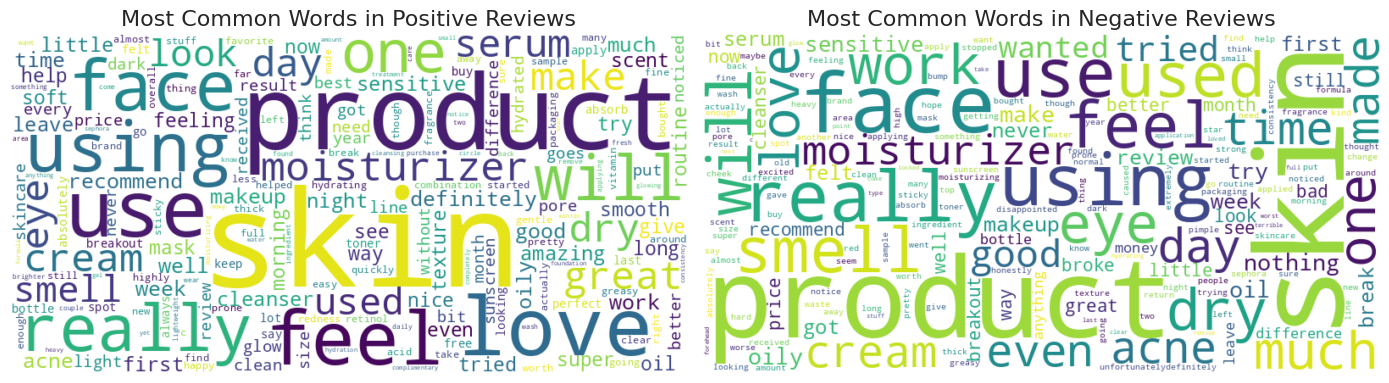

In [ ]:
print("Generating word clouds for positive and negative reviews...")

# Separate text for positive and negative reviews
positive_reviews_text = " ".join(review for review in df_balanced_shuffled[df_balanced_shuffled['sentiment_label'] == 'positive']['cleaned_review'])
negative_reviews_text = " ".join(review for review in df_balanced_shuffled[df_balanced_shuffled['sentiment_label'] == 'negative']['cleaned_review'])

wc_positive = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(positive_reviews_text)
wc_negative = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(negative_reviews_text)


fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Positive Word Cloud
axes[0].imshow(wc_positive, interpolation='bilinear')
axes[0].set_title('Most Common Words in Positive Reviews', fontsize=16)
axes[0].axis('off')

# Plot Negative Word Cloud
axes[1].imshow(wc_negative, interpolation='bilinear')
axes[1].set_title('Most Common Words in Negative Reviews', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Top 10 Most Discussed Aspects


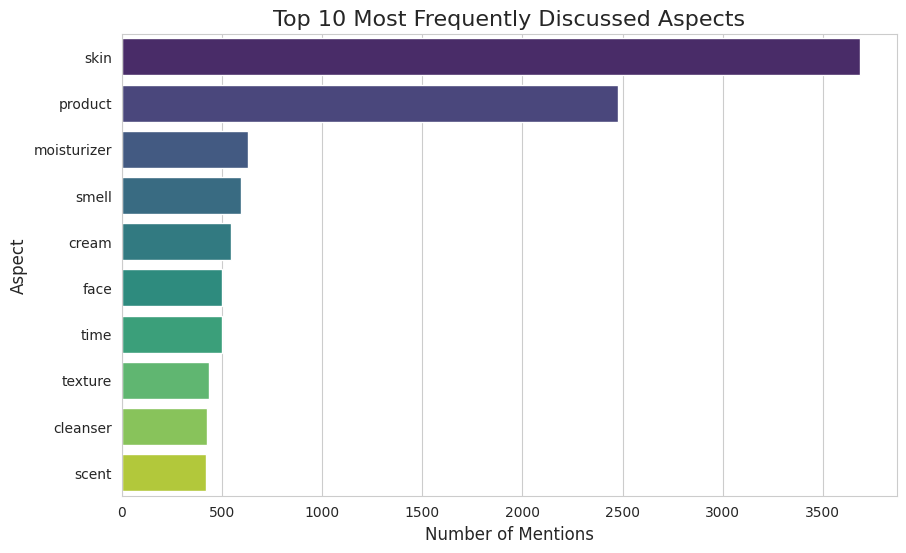

In [ ]:
top_10_aspects = df_absa_results['aspect'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_aspects.values, y=top_10_aspects.index, hue=top_10_aspects.index, palette='viridis', orient='h')

plt.title('Top 10 Most Frequently Discussed Aspects', fontsize=16)
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Aspect', fontsize=12)
plt.show()

## Sentiment Breakdown of Top Aspects


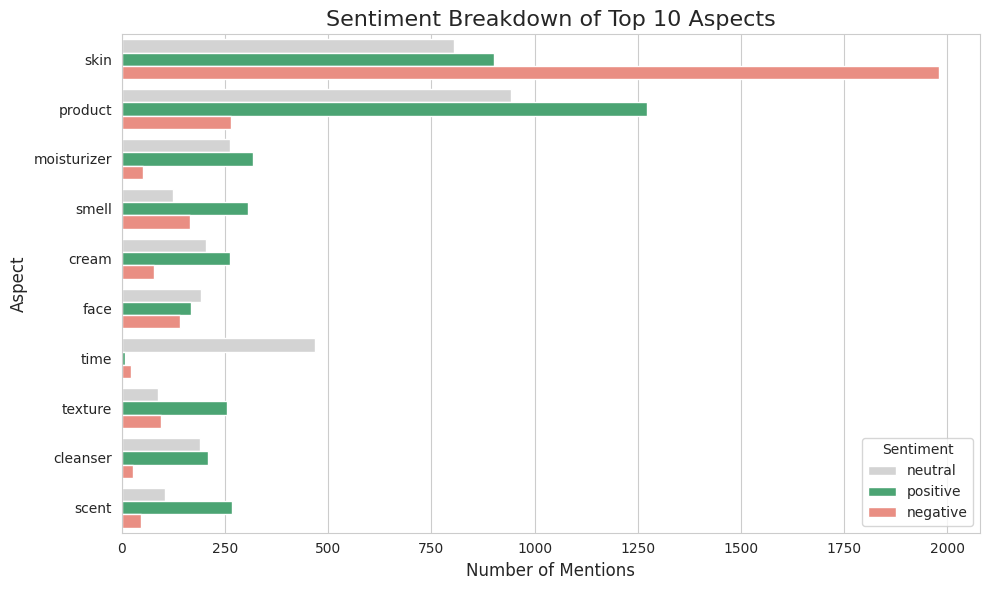

In [ ]:
top_10_aspect_names = top_10_aspects.index.tolist()

# Filter ABSA results to only include these top aspects
df_top_aspects = df_absa_results[df_absa_results['aspect'].isin(top_10_aspect_names)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_aspects, y='aspect', hue='aspect_sentiment',
              order=top_10_aspect_names,
              palette=sentiment_colors)

plt.title('Sentiment Breakdown of Top 10 Aspects', fontsize=16)
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Aspect', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Top 10 Most Common Opinion Words

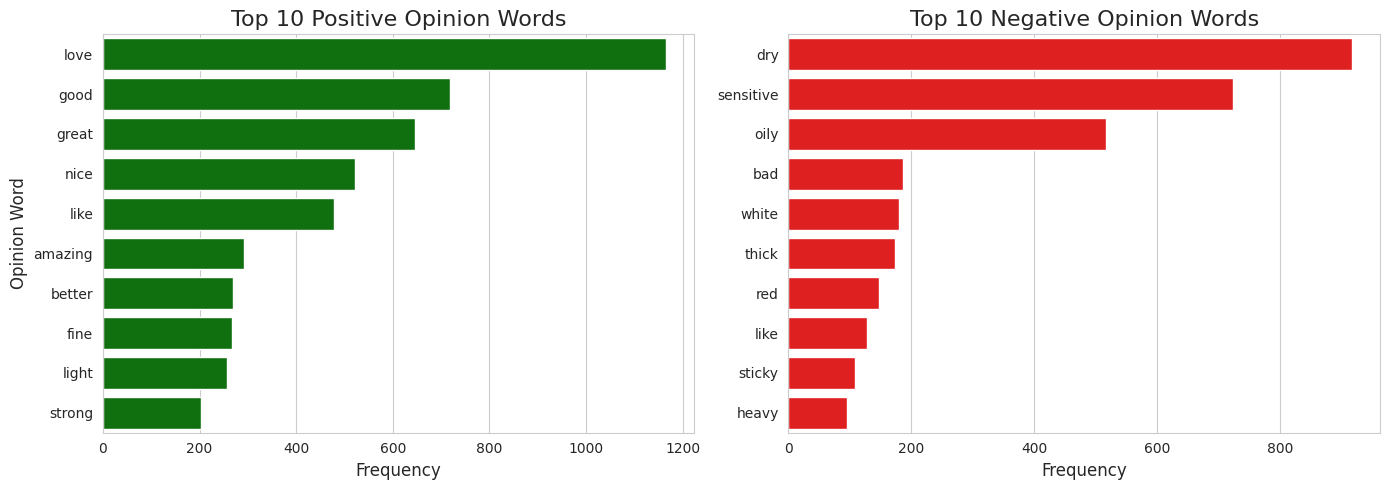

In [ ]:
# Separate positive and negative opinions
df_positive_opinions = df_absa_results[df_absa_results['aspect_sentiment'] == 'positive']
df_negative_opinions = df_absa_results[df_absa_results['aspect_sentiment'] == 'negative']

top_10_positive_words = df_positive_opinions['opinion_word'].value_counts().head(10)
top_10_negative_words = df_negative_opinions['opinion_word'].value_counts().head(10)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Top Positive Opinion Words
sns.barplot(ax=axes[0], x=top_10_positive_words.values, y=top_10_positive_words.index, color='green')
axes[0].set_title('Top 10 Positive Opinion Words', fontsize=16)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Opinion Word', fontsize=12)

# Plot Top Negative Opinion Words
sns.barplot(ax=axes[1], x=top_10_negative_words.values, y=top_10_negative_words.index, color='red')
axes[1].set_title('Top 10 Negative Opinion Words', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()